In [1]:
import matplotlib.pyplot as plt
from random import randint# for sorting and creating data points for the convex hull excercise
from math import atan2 # for computing polar angle in convex hull excersise


### Bubble sort

In [2]:
arr= [1,5,2,4,3,6]
def bubble(arr):
    print('Estado inicial: ',arr)
    for i in range (len(arr)-1,0,-1):
        for j in range(i):
            if(arr[j]>arr[j+1]):
                temp = arr[j]
                arr[j]= arr[j+1]
                arr[j+1]=temp
        print(arr)
    
    return arr

print('Ordenado: ',bubble(arr))


Estado inicial:  [1, 5, 2, 4, 3, 6]
[1, 2, 4, 3, 5, 6]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]
Ordenado:  [1, 2, 3, 4, 5, 6]


### Selection sort

In [3]:
arr= [1,5,2,4,3,6]
def selection(arr):
    print('Estado inicial: ',arr)
    for i in range(len(arr)-1):
        minpos = i
        for j in range(i,len(arr)):
            if arr[j] < arr[minpos]:
                minpos = j

        temp = arr[i]
        arr[i] = arr[minpos]
        arr[minpos]= temp
        print(arr)

    return arr

print('Ordenado: ',selection(arr))


Estado inicial:  [1, 5, 2, 4, 3, 6]
[1, 5, 2, 4, 3, 6]
[1, 2, 5, 4, 3, 6]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]
Ordenado:  [1, 2, 3, 4, 5, 6]


### Comparison

In the bubble sort you execute a higher number of swaps because the 3 code lines that perform this task are written in the nested for loop, while in selection these 3 lines are located in the outter for. <br>

Nevertheless, the complexity of both algorithms is the same : O(n^2)

### Insertion Sort : Complexity = O(n^2)

In [4]:
arr= [1,5,2,4,3,6]

def insertion(arr):
    for i in range(1,len(arr)):# O(n)
        j = i#O(1)
        while arr[j-1] > arr[j] and  j>0:#O(n)
            arr[j-1], arr[j] = arr[j], arr[j-1]#Swapping in python with swag: O(1)
            j -=1 #O(1)
    print(arr)#O(1)

insertion(arr)


[1, 2, 3, 4, 5, 6]


### Fibonacci pseudocode: Complexity = O(n)

WRITE 'Input the number of elements of the fibonacci series you want'<br>
READ N<br>
FOR i = 1 TO N DO<br>
IF (i = 1)<br>
F1 = 1<br>
WRITE (F1)<br>
ELSE IF (i = 2)<br>
F2 = 1<br>
WRITE (F2)<br>
ELSE<br>
F3 = F1 + F2<br>
WRITE (F3)<br>
F1 = F2<br>
F2 = F3<br>
END IF-ELSE<br>
END FOR<br>

### Fibonacci implementation: Complexity = O(n)

In [15]:
def fibonacci(n):
    a = 0#O(1)
    b = 1#O(1)

    for i in range (0,n):#O(n)
        if( i == 0):#O(1)
            print(a)#O(1)
        elif(i==1):
            print(b)#O(1)
        else:
            c = a+b#O(1)
            a = b#O(1)
            b = c#O(1)
            print(c)#O(1)

fibonacci(10) 

0
1
1
2
3
5
8
13
21
34


### Recursive fibonacci

In [6]:
def recursive_fibonacci(n):
    if n ==0:
        return 0
    elif n ==1:
        return 1
    else:
        return recursive_fibonacci(n-2) + recursive_fibonacci(n-1)

for i in range(5):
    print(recursive_fibonacci(i))

0
1
1
2
3


### Convex Hull

Given a set of (x,y) coordinates, we'll call S, the convex hull is the smallest convex set that contains all points in S. <br>

How to construct a convex hull? <br>
There are many possible approaches: <br>
Graham scan -> O(n log n) <br>
Gift Wrapper -> O(nh) <br>
Quickhull -> O(n log n)<br>
Chan's Algorithm -> O(n log n)<br>
And more... <br>

For this note book we will use the Graham Scan algorithm

### Graham Scan

Steps: <br>
1. Find the point (P) with the lowest y-coordinate (if duplicates, choose the one with the lowest x-coordinate).
2. Sort the remaining points in order of increasing polar angle from P (if duplicates, order by increasing distance from P)
3. Initializa the hull with the anchor point P and the first element in the sorted list.
4. Iterate over each point in the sorted list and determine if traversing to it from the prior two points in the hull constitutes making a CW or CCW rotation. If CW, backtrack (delete points on hull) until adding this point constitutes a counter clockwise rotation

### Graham scan pseudocode

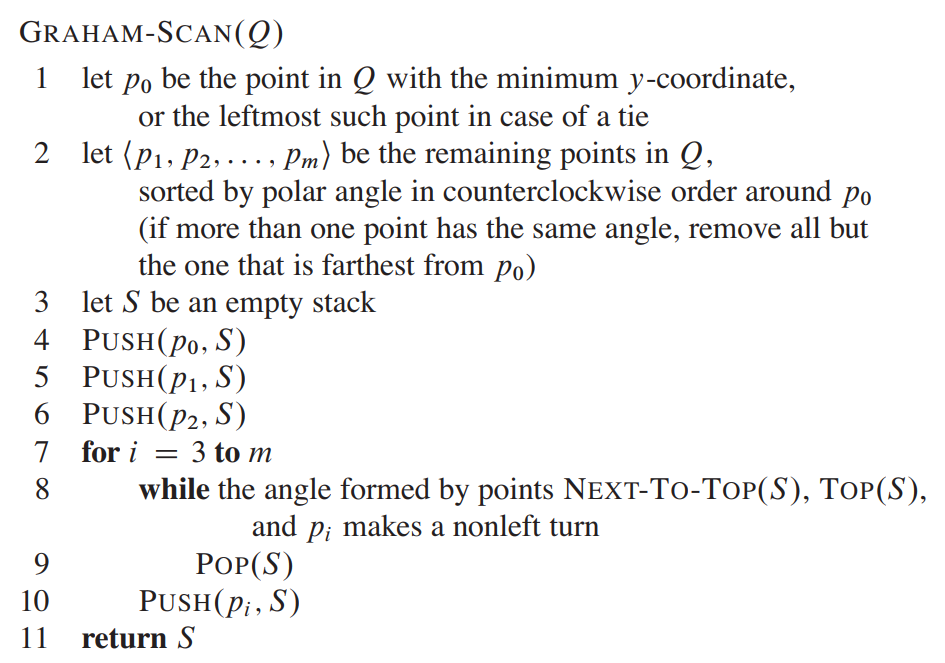

### A cool implemenntation i found

Points: [[42, 2], [24, 20], [43, 9], [42, 27], [24, 22], [45, 49], [4, 43], [15, 11], [2, 23], [25, 4]]


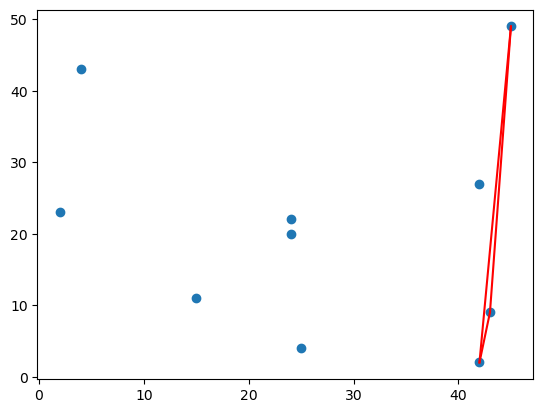

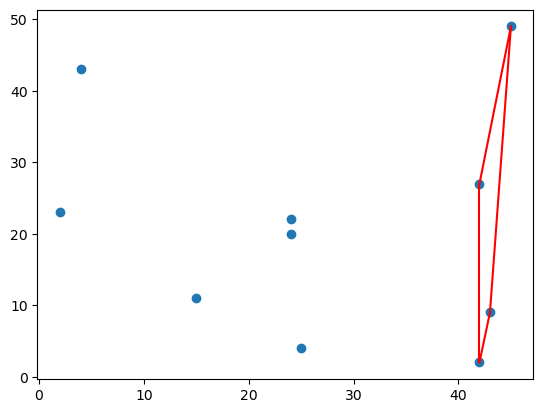

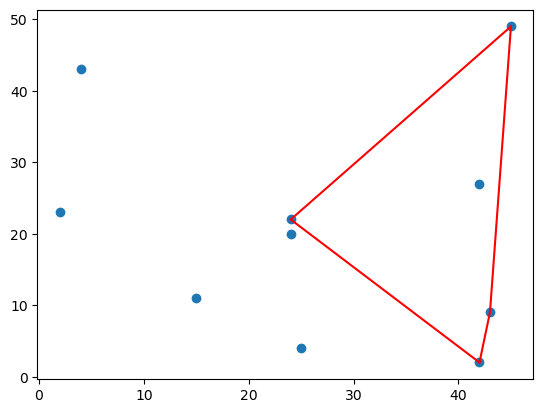

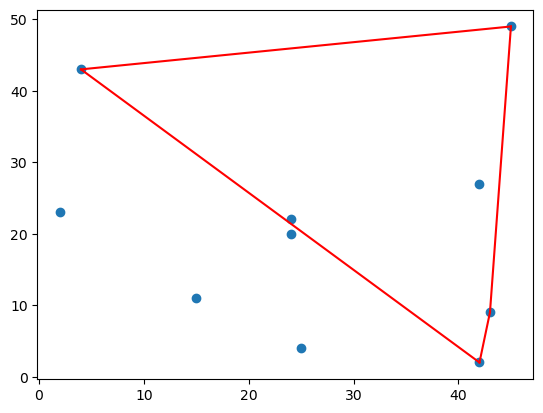

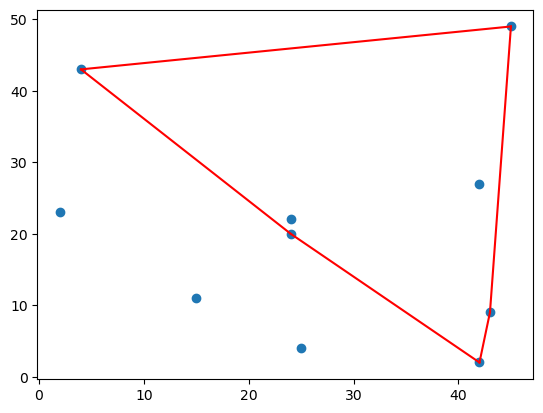

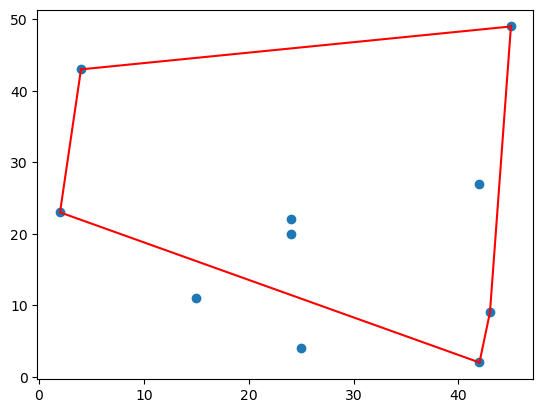

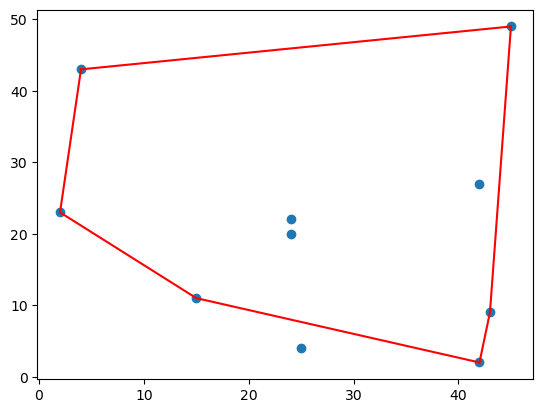

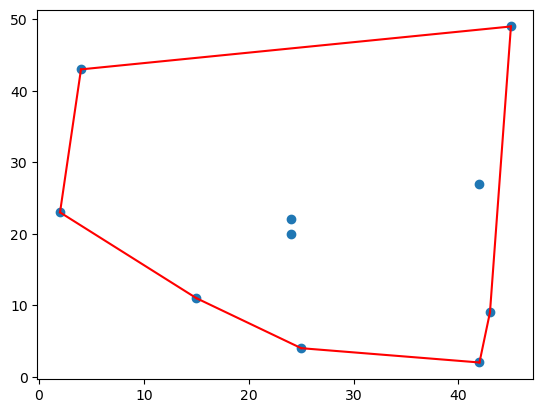

Hull: [[42, 2], [43, 9], [45, 49], [4, 43], [2, 23], [15, 11], [25, 4]]


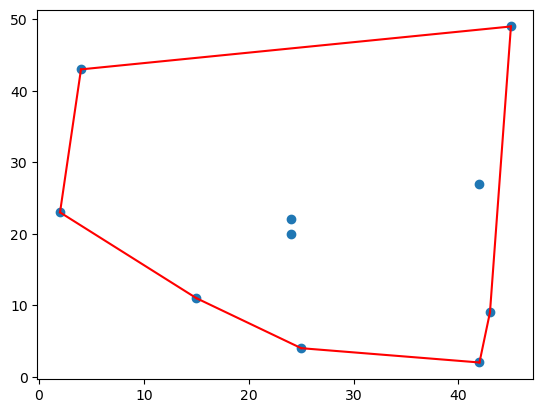

In [7]:
# Returns a list of (x,y) coordinates of length 'num_points',
# each x and y coordinate is chosen randomly from the range 
# 'min' up to 'max'.
def create_points(ct,min=0,max=50):
	return [[randint(min,max),randint(min,max)] \
			for _ in range(ct)]

# Creates a scatter plot, input is a list of (x,y) coordinates.
# The second input 'convex_hull' is another list of (x,y) coordinates
# consisting of those points in 'coords' which make up the convex hull,
# if not None, the elements of this list will be used to draw the outer
# boundary (the convex hull surrounding the data points).
def scatter_plot(coords,convex_hull=None):
	xs,ys=zip(*coords) # unzip into x and y coord lists
	plt.scatter(xs,ys) # plot the data points

	if convex_hull!=None:
		# plot the convex hull boundary, extra iteration at
		# the end so that the bounding line wraps around
		for i in range(1,len(convex_hull)+1):
			if i==len(convex_hull): i=0 # wrap
			c0=convex_hull[i-1]
			c1=convex_hull[i]
			plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
	plt.show()


# Returns the polar angle (radians) from p0 to p1.
# If p1 is None, defaults to replacing it with the
# global variable 'anchor', normally set in the 
# 'graham_scan' function.
def polar_angle(p0,p1=None):
	if p1==None: p1=anchor
	y_span=p0[1]-p1[1]
	x_span=p0[0]-p1[0]
	return atan2(y_span,x_span)


# Returns the euclidean distance from p0 to p1,
# square root is not applied for sake of speed.
# If p1 is None, defaults to replacing it with the
# global variable 'anchor', normally set in the 
# 'graham_scan' function.
def distance(p0,p1=None):
	if p1==None: p1=anchor
	y_span=p0[1]-p1[1]
	x_span=p0[0]-p1[0]
	return y_span**2 + x_span**2


# Returns the determinant of the 3x3 matrix...
# 	[p1(x) p1(y) 1]
#	[p2(x) p2(y) 1]
# 	[p3(x) p3(y) 1]
# If >0 then counter-clockwise
# If <0 then clockwise
# If =0 then collinear
def det(p1,p2,p3):
	return   (p2[0]-p1[0])*(p3[1]-p1[1]) \
			-(p2[1]-p1[1])*(p3[0]-p1[0])


# Sorts in order of increasing polar angle from 'anchor' point.
# 'anchor' variable is assumed to be global, set from within 'graham_scan'.
# For any values with equal polar angles, a second sort is applied to
# ensure increasing distance from the 'anchor' point.
def quicksort(a):
	if len(a)<=1: return a
	smaller,equal,larger=[],[],[]
	piv_ang=polar_angle(a[randint(0,len(a)-1)]) # select random pivot
	for pt in a:
		pt_ang=polar_angle(pt) # calculate current point angle
		if   pt_ang<piv_ang:  smaller.append(pt)
		elif pt_ang==piv_ang: equal.append(pt)
		else: 				  larger.append(pt)
	return   quicksort(smaller) \
			+sorted(equal,key=distance) \
			+quicksort(larger)


# Returns the vertices comprising the boundaries of
# convex hull containing all points in the input set. 
# The input 'points' is a list of (x,y) coordinates.
# If 'show_progress' is set to True, the progress in 
# constructing the hull will be plotted on each iteration.
def graham_scan(points,show_progress=True):
	global anchor # to be set, (x,y) with smallest y value

	# Find the (x,y) point with the lowest y value,
	# along with its index in the 'points' list. If
	# there are multiple points with the same y value,
	# choose the one with smallest x.
	min_idx=None
	for i,(x,y) in enumerate(points):
		if min_idx==None or y<points[min_idx][1]:
			min_idx=i
		if y==points[min_idx][1] and x<points[min_idx][0]:
			min_idx=i

	# set the global variable 'anchor', used by the
	# 'polar_angle' and 'distance' functions
	anchor=points[min_idx]

	# sort the points by polar angle then delete 
	# the anchor from the sorted list
	sorted_pts=quicksort(points)
	del sorted_pts[sorted_pts.index(anchor)]

	# anchor and point with smallest polar angle will always be on hull
	hull=[anchor,sorted_pts[0]]
	for s in sorted_pts[1:]:
		while det(hull[-2],hull[-1],s)<=0:
			del hull[-1] # backtrack
			#if len(hull)<2: break
		hull.append(s)
		if show_progress: scatter_plot(points,hull)
	return hull

# For each size in the 'sizes' list, compute the average
# time to find the Convex Hull for a dataset of that size,
# the range used for max and min for the create_points function
# is always 10 times the highest value in the 'sizes' list.
def benchmark(sizes=[10,100,1000,10000,100000]):
	for s in sizes:
		tot=0.0
		for _ in range(3):
			pts=create_points(s,0,max(sizes)*10)
			t0=time()
			hull=graham_scan(pts,False)
			tot+=(time()-t0)
		print ("size %d time: %0.5f"%(s,tot/3.0))


pts=create_points(10)
print("Points:",pts)
hull=graham_scan(pts,True)
print ("Hull:",hull)
scatter_plot(pts,hull)